In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
df=pd.read_csv("Zoo.csv")

In [17]:
df.drop(columns=['animal name'],inplace=True)

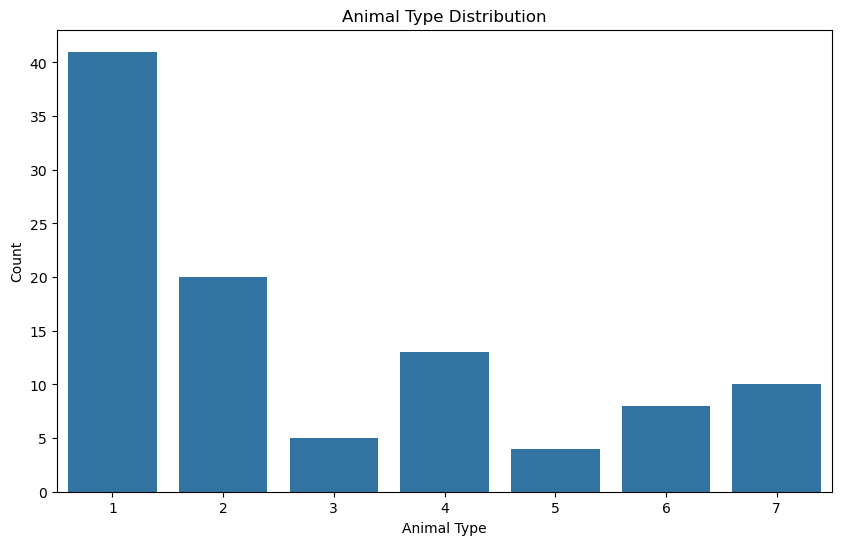

In [18]:
# 1. Data Visualization
plt.figure(figsize=(10,6))
sns.countplot(x='type',data=df)
plt.title("Animal Type Distribution")
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.show()

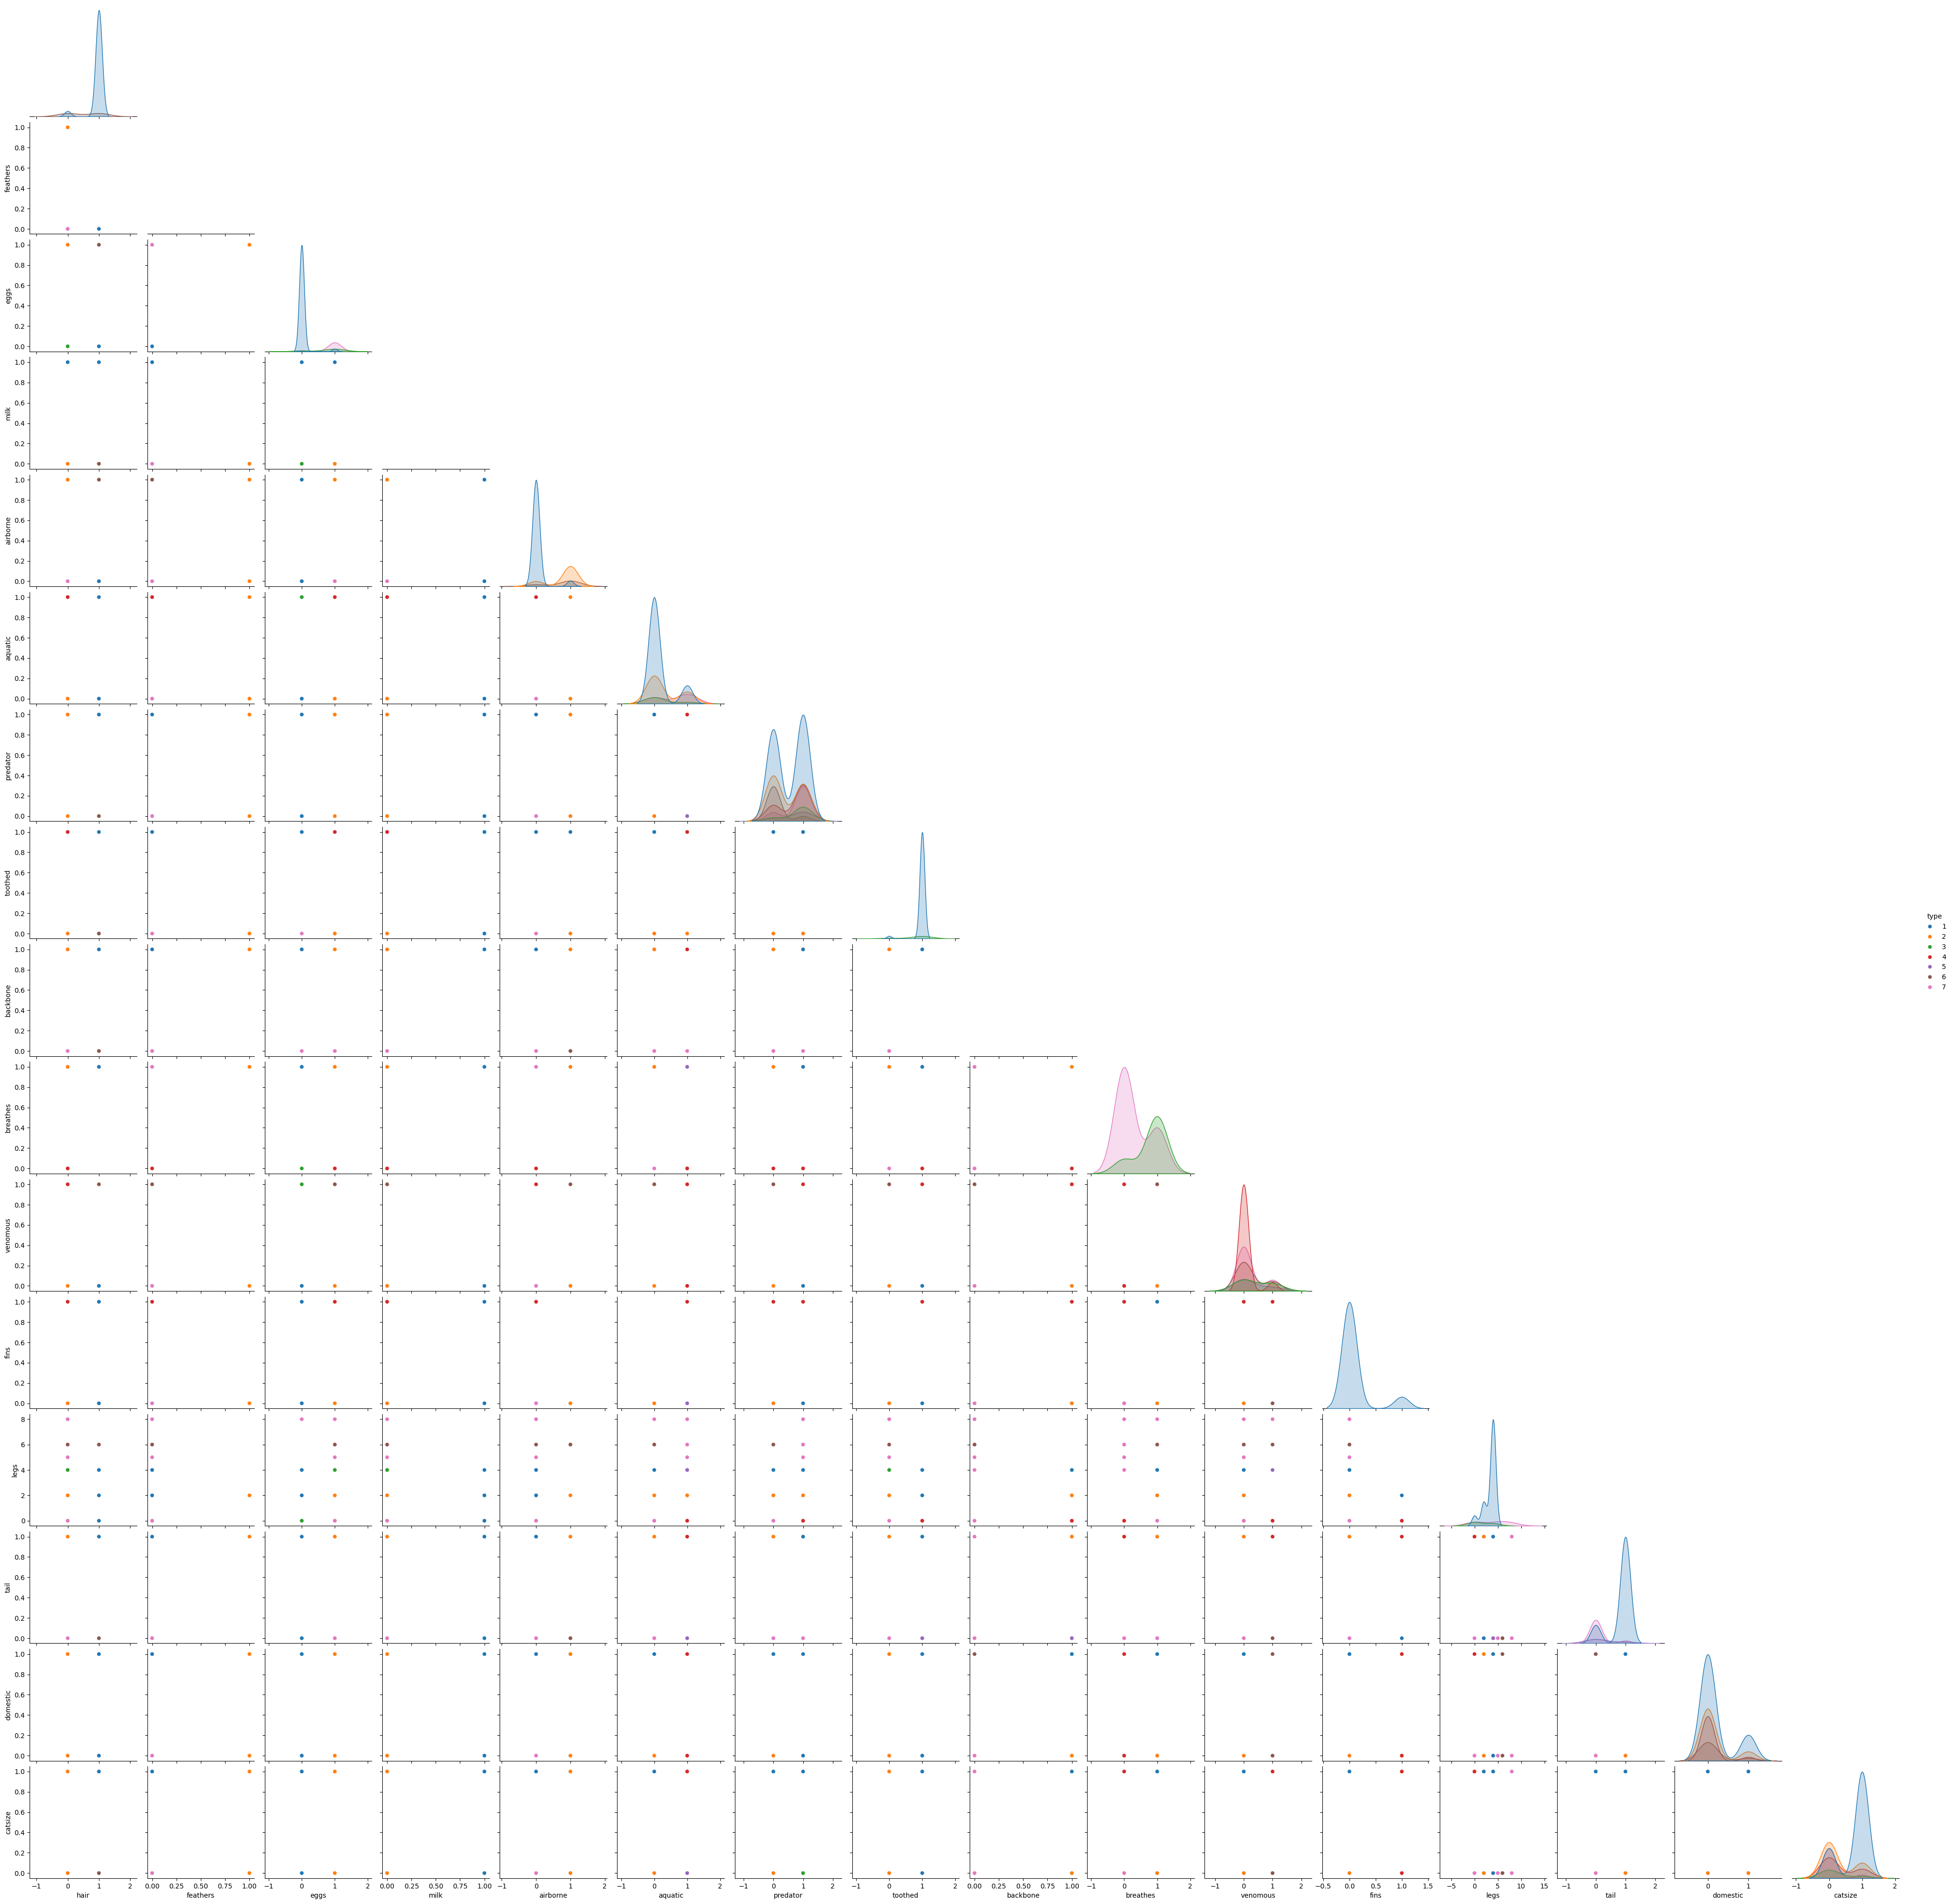

In [6]:
sns.pairplot(df,hue='type',palette='tab10',corner=True)
plt.show()

In [7]:
# 2. Data Preprocessing
df.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [19]:
scaler=StandardScaler()
X=df.drop(columns=['type'])
y=df['type']
X_scaled=scaler.fit_transform(X)

In [20]:
# 3. Train-test split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)

In [21]:
# 4. Implement KNN Classifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
# 5. Evaluation
y_pred=knn.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Confusion Matrix:
 [[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


In [23]:
# 6. Visualize decision boundaries
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_pca,y,test_size=0.2,random_state=42,stratify=y)
knn_pca=KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca,y_train_pca)

KNeighborsClassifier()

In [24]:
# Create meshgrid
x_min,x_max=X_pca[:,0].min()- 1,X_pca[:,0].max()+1
y_min,y_max=X_pca[:,1].min()-1,X_pca[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

Z=knn_pca.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

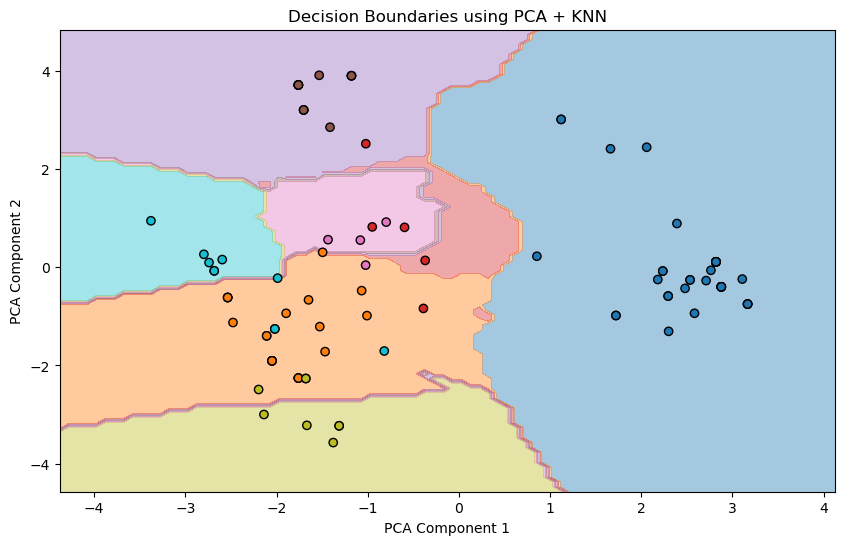

In [25]:
plt.figure(figsize=(10,6))
plt.contourf(xx,yy,Z,alpha=0.4,cmap='tab10')
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,edgecolor='k',cmap='tab10')
plt.title('Decision Boundaries using PCA + KNN')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [1]:
#1. Key hyperparameters in KNN:

# k (number of neighbors): Determines how many nearest neighbors are considered for prediction.
#Distance metric: The method used to calculate the distance between points (e.g., Euclidean, Manhattan).
#Weights: How to weight the neighbors (e.g., uniform, distance-based).

In [2]:
#2. Distance metrics in KNN:

#Euclidean distance: Straight-line distance (most common).
#Manhattan distance: Sum of absolute differences.
#Minkowski distance: Generalization of Euclidean and Manhattan (controlled by a parameter p).
#Cosine similarity: Measures the cosine of the angle between vectors (more for sparse/high-dimensional data).
#Hamming distance: For categorical/binary data.